In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np

In [47]:
era = 2018

In [48]:
if era == 2018:
    f_MC = uproot.open("../../data/pileup/mcPileupUL2018.root")
    f_data = uproot.open(
        "../../data/pileup/PileupHistogram-UL2018-100bins_withVar.root"
    )
elif era == 2017:
    f_MC = uproot.open("../../data/pileup/mcPileupUL2017.root")
    f_data = uproot.open(
        "../../data/pileup/PileupHistogram-UL2017-100bins_withVar.root"
    )
elif era == 2016:
    f_MC = uproot.open("../../data/pileup/mcPileupUL2016.root")
    f_data = uproot.open(
        "../../data/pileup/PileupHistogram-UL2016-100bins_withVar.root"
    )
else:
    print(
        "no pileup weights because no year was selected for function pileup_weight"
    )

In [49]:
hist_MC = f_MC["pu_mc"].to_numpy()
# Normalize the data distribution
hist_data = f_data["pileup"].to_numpy()
hist_data[0].sum()
norm_data = hist_data[0] / hist_data[0].sum()
weights = np.divide(
    norm_data, hist_MC[0], out=np.ones_like(norm_data), where=hist_MC[0] != 0
)

# The plus version of the pileup
hist_data_plus = f_data["pileup_plus"].to_numpy()
hist_data_plus[0].sum()
norm_data_plus = hist_data_plus[0] / hist_data_plus[0].sum()
weights_plus = np.divide(
    norm_data_plus,
    hist_MC[0],
    out=np.ones_like(norm_data_plus),
    where=hist_MC[0] != 0,
)

# The minus version of the pileup
hist_data_minus = f_data["pileup_minus"].to_numpy()
hist_data_minus[0].sum()
norm_data_minus = hist_data_minus[0] / hist_data_minus[0].sum()
weights_minus = np.divide(
    norm_data_minus,
    hist_MC[0],
    out=np.ones_like(norm_data_minus),
    where=hist_MC[0] != 0,
)

In [50]:
import mplhep as hep
import matplotlib
matplotlib.rcParams.update({'figure.max_open_warning': 0})
matplotlib.rcParams['figure.facecolor'] = 'white'

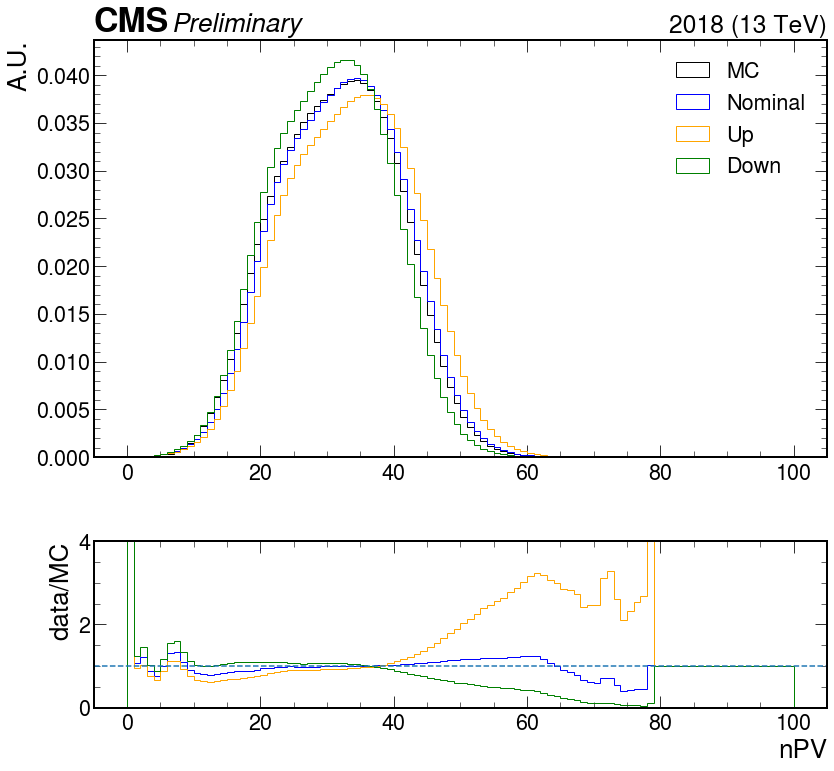

In [51]:
binc = np.array([ 0.5*(hist_MC[1][i]+hist_MC[1][i+1])for i in range(hist_MC[1].shape[0]-1)])

hep.style.use("CMS")
plt.style.use(hep.style.CMS)
plt.figure(figsize=(12,14))
plt.gcf().subplots_adjust(bottom=0.15, left=0.17)
ax1 = plt.subplot2grid((4,1), (0,0),rowspan=2)
hep.cms.label(llabel='Preliminary',year=era, data=False)
ax1.hist(binc, weights=hist_MC[0],bins=hist_MC[1], color='black', fill=False, histtype='step')
ax1.hist(binc, weights=norm_data,bins=hist_MC[1], color='blue', fill=False, histtype='step')
ax1.hist(binc, weights=norm_data_plus,bins=hist_MC[1], color='orange', fill=False, histtype='step')
ax1.hist(binc, weights=norm_data_minus,bins=hist_MC[1], color='green', fill=False, histtype='step')
ax1.set_ylabel("A.U.")
#ax1.set_yscale('log')
ax1.legend(labels=[r"MC",r"Nominal",r"Up",r"Down"])
ax2 = plt.subplot2grid((4,1), (2,0),sharex=ax1)
ax2.hist(binc, weights=weights,bins=hist_MC[1], color='blue', fill=False, histtype='step')
ax2.hist(binc, weights=weights_plus,bins=hist_MC[1], color='orange', fill=False, histtype='step')
ax2.hist(binc, weights=weights_minus,bins=hist_MC[1], color='green', fill=False, histtype='step')
ax2.axhline(1,ls='--')
ax2.set_xlabel(r"nPV")
ax2.set_ylabel("data/MC")
ax2.set_ylim(0.0,4.0)
plt.tight_layout()
plt.savefig("/home/submit/freerc/public_html/SUEP_note_plots/pu_weight_{}.png".format(era))
plt.savefig("/home/submit/freerc/public_html/SUEP_note_plots/pu_weight_{}.pdf".format(era))